In [1]:
%matplotlib inline
import numpy 
from matplotlib import pyplot
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [2]:
def rho_red_light(nx,rho_max,rho_in):
    
    rho = rho_max*numpy.ones(nx)
    rho[:int((nx-1)*3./4.)] = rho_in
    return rho


In [3]:
nx = 81
nt = 30 
dx = 4.0/(nx-1)

In [4]:
rho_in = 3.
rho_max = 10.

u_max = 1.

x = numpy.linspace(0,4,nx)

rho = rho_red_light(nx, rho_max, rho_in)

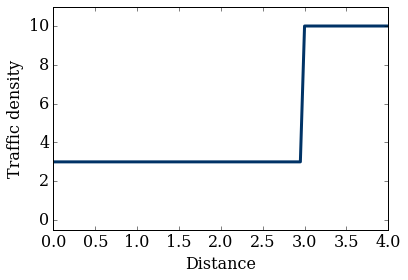

In [5]:
pyplot.plot(x, rho, color='#003366', ls='-', lw=3)
pyplot.ylabel('Traffic density')
pyplot.xlabel('Distance')
pyplot.ylim(-0.5,11.);

In [6]:
def computeF(u_max, rho_max, rho):

    return u_max*rho*(1-rho/rho_max)

In [7]:
from matplotlib import animation
from JSAnimation.IPython_display import display_animation

In [8]:
def animate(data):
    x = numpy.linspace(0,4,nx)
    y = data
    line.set_data(x,y)
    return line,

In [24]:
def lax(rho, nt, dt, dx, rho_max, u_max):
    rho_n = numpy.zeros((nt,len(rho)))
    rho_n[:,:] = rho.copy()
    
    for t in range(1,nt):
        F = computeF(u_max, rho_max, rho)
        rho_n[t,1:-1] = .5*(rho[2:]+rho[:-2]) - dt/(2*dx)*(F[2:]-F[:-2])
        rho_n[t,0] = rho[0]
        rho_n[t,-1] = rho[-1]
        rho = rho_n[t].copy()
    return rho_n

In [25]:
sigma = 1.0 
dt = sigma*dx/u_max

rho = rho_red_light(nx, rho_max, rho_in)
rho_n = lax(rho, nt, dt, dx, rho_max, u_max)

In [26]:
rho_n.shape

(30, 81)


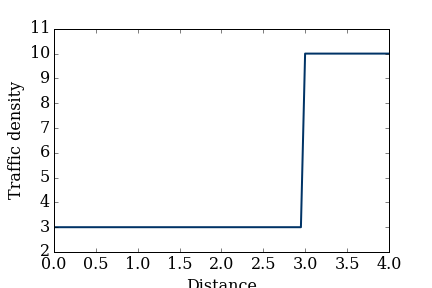
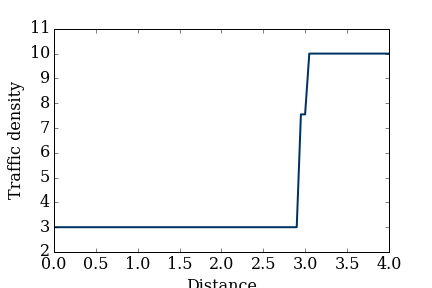
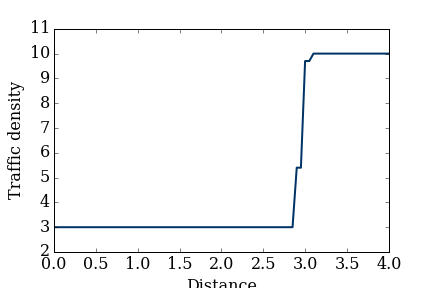
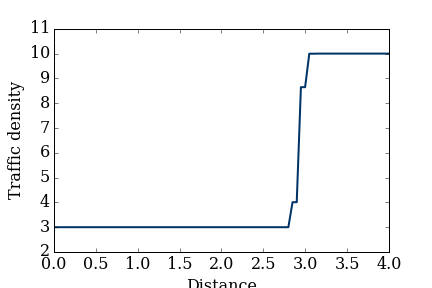
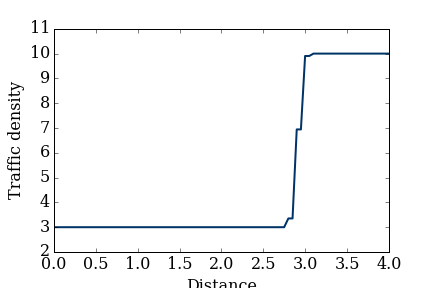
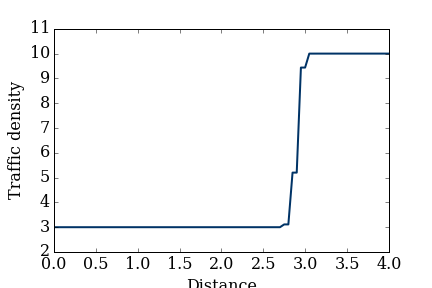
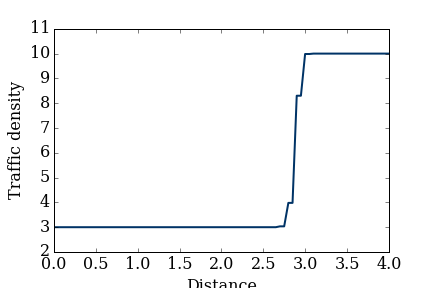
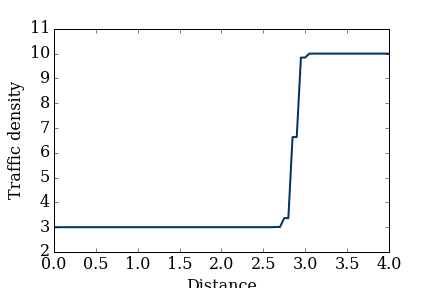
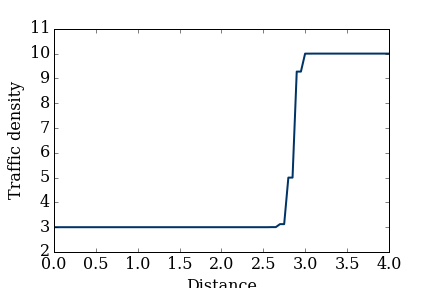
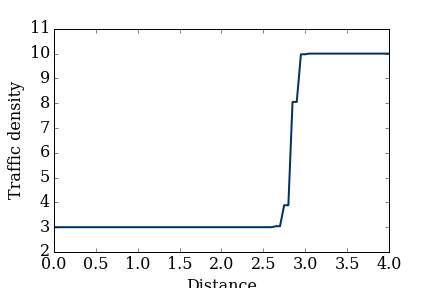
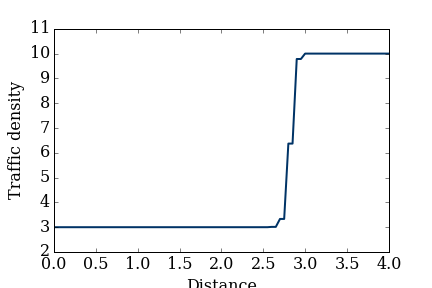
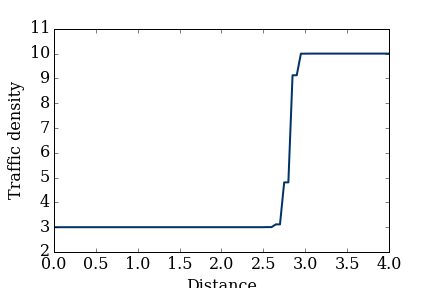
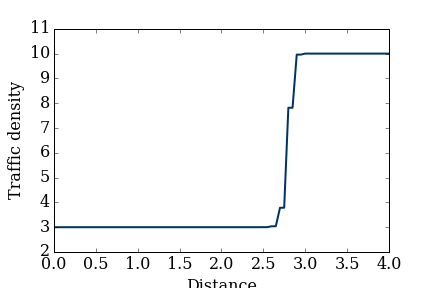
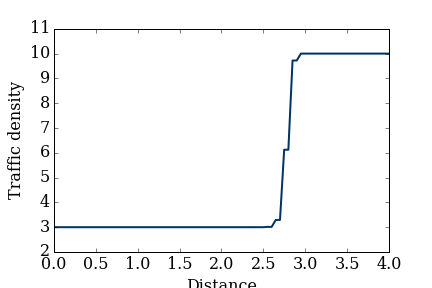
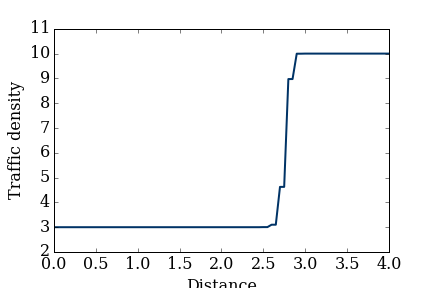
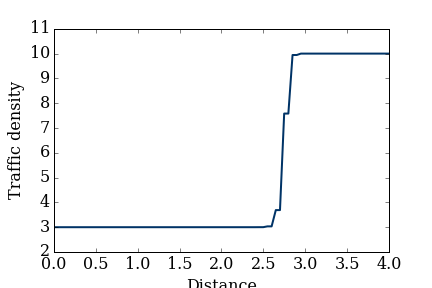
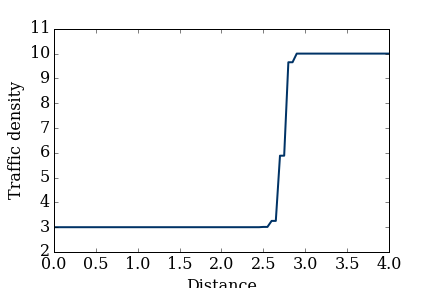
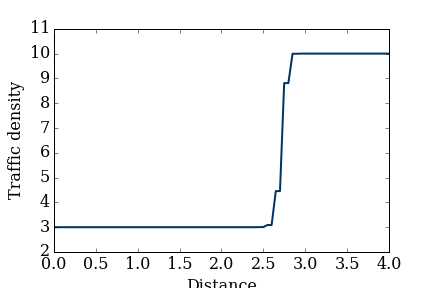
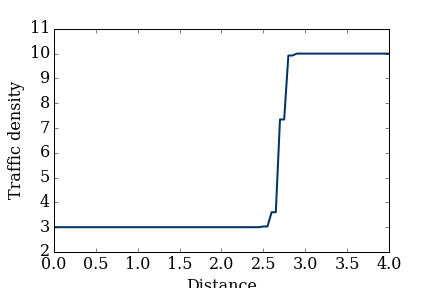
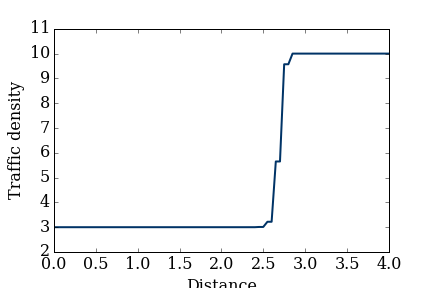
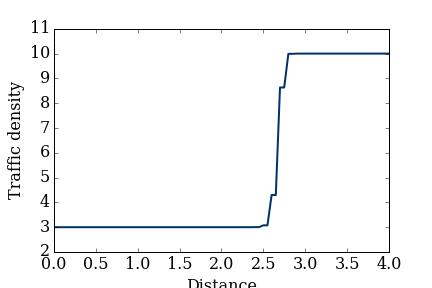
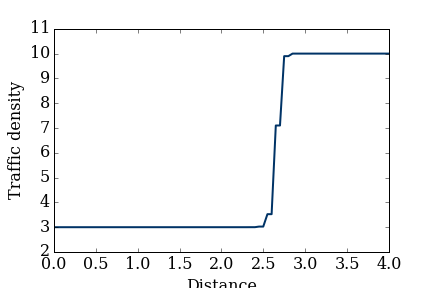
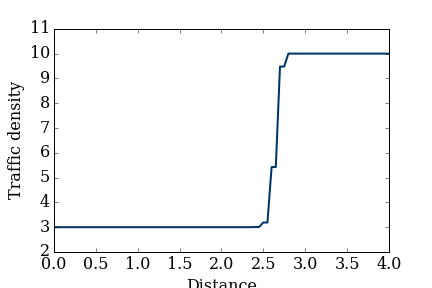
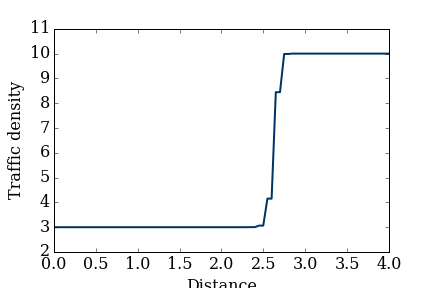
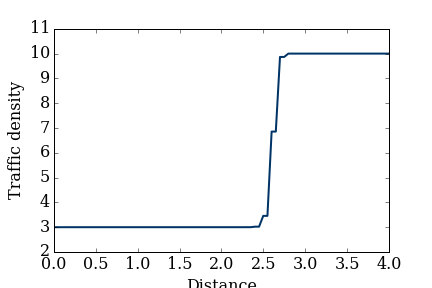
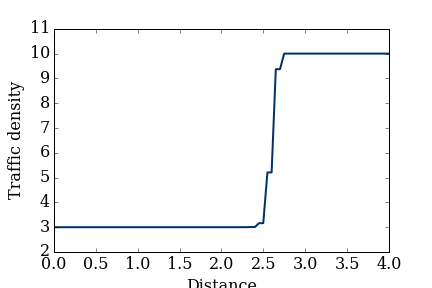
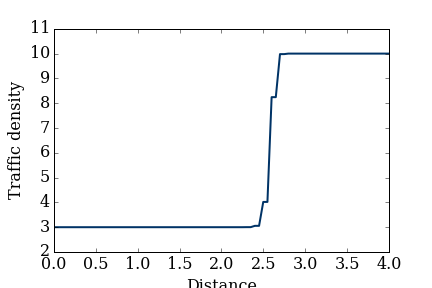
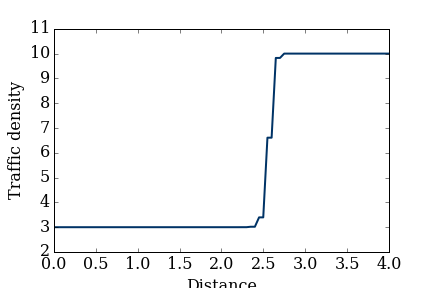
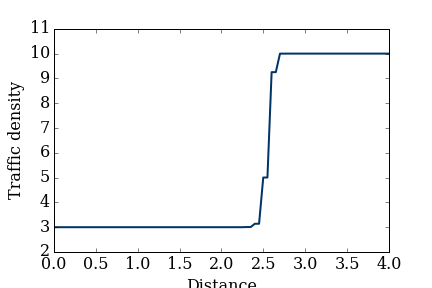
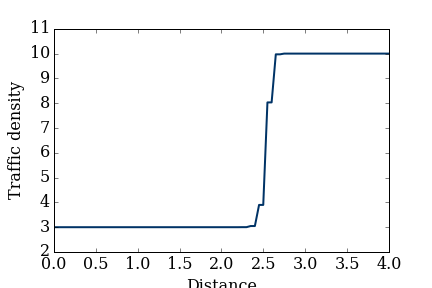

In [27]:
fig = pyplot.figure();
ax = pyplot.axes(xlim=(0,4),ylim=(2,11),xlabel=('Distance'),ylabel=('Traffic density'));
line, = ax.plot([],[],color='#003366', lw=2);

anim = animation.FuncAnimation(fig, animate, frames=rho_n, interval=50)
display_animation(anim, default_mode='once')

In [28]:
sigma = 0.5
dt = sigma*dx/u_max

rho = rho_red_light(nx, rho_max, rho_in)
rho_n = lax(rho, nt, dt, dx, rho_max, u_max)


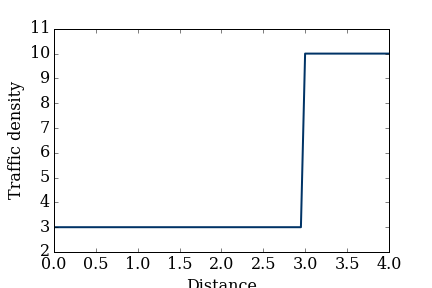
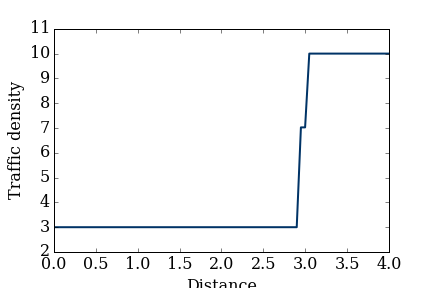
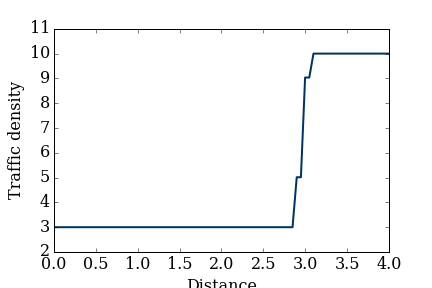
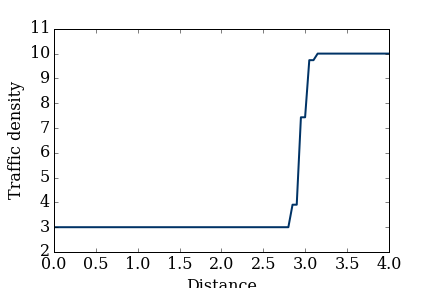
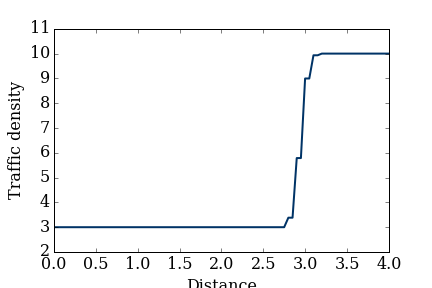
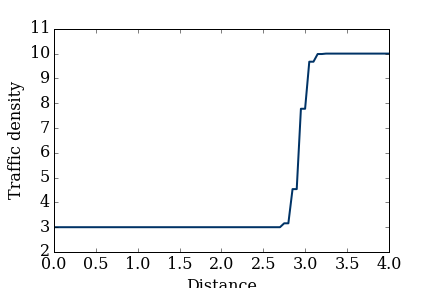
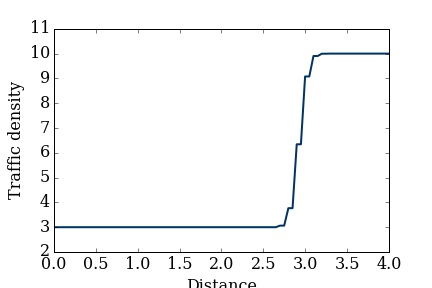
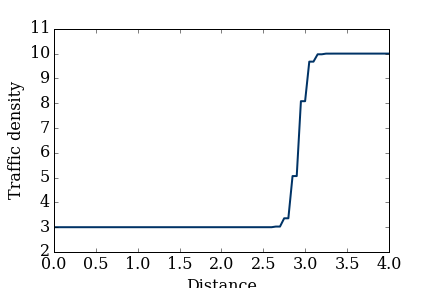
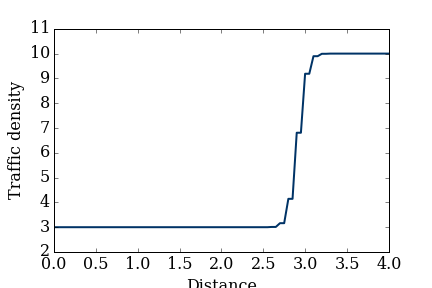
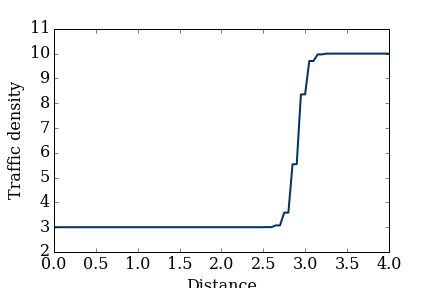
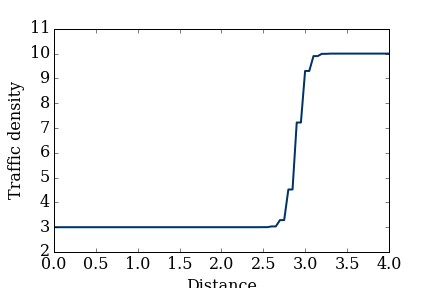
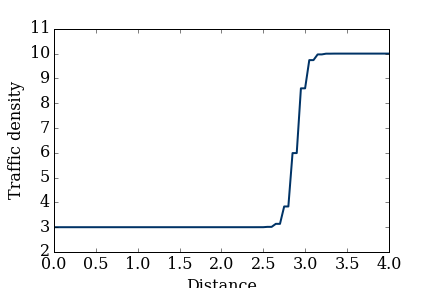
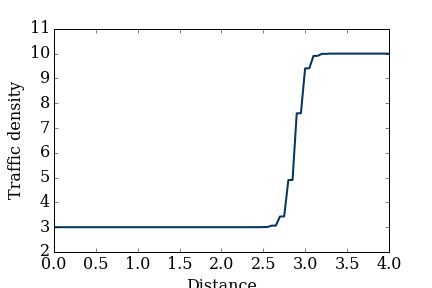
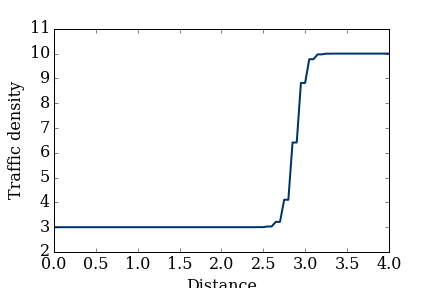
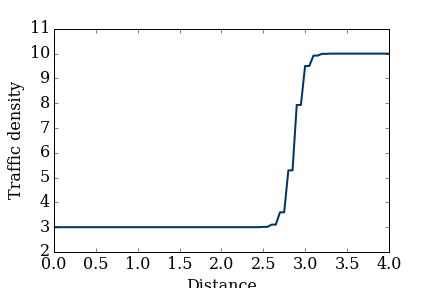
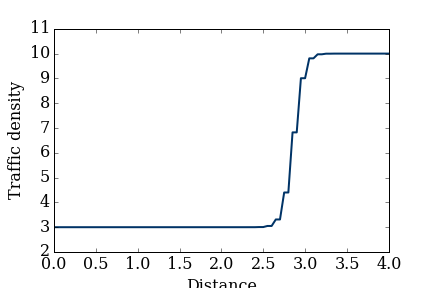
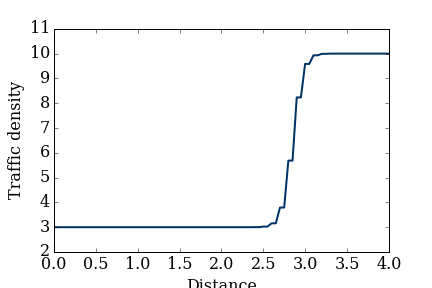
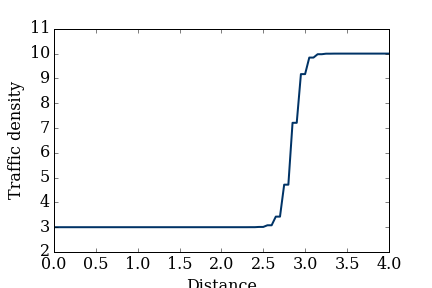
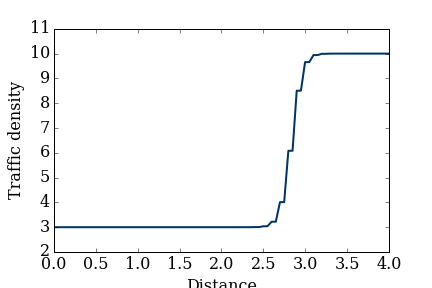
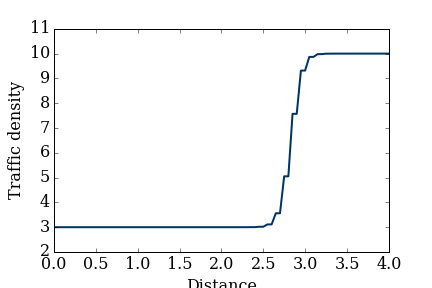
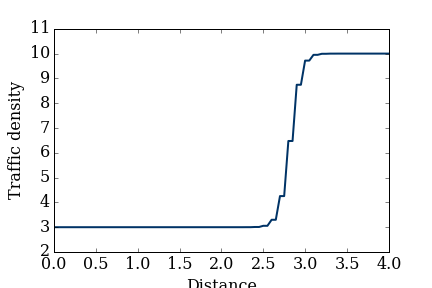
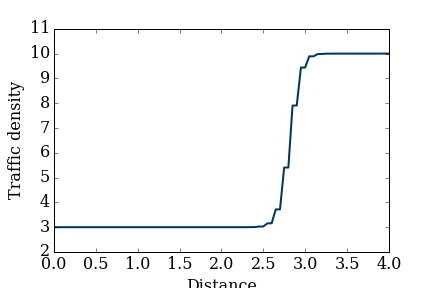
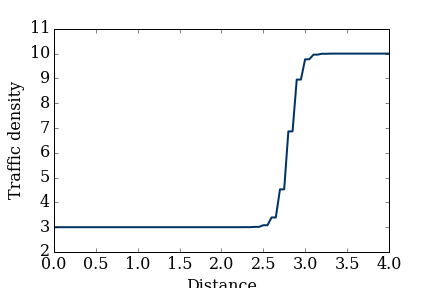
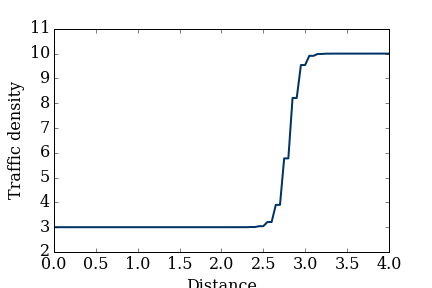
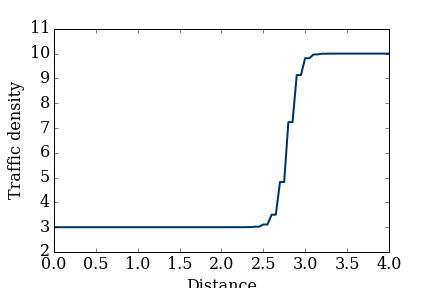
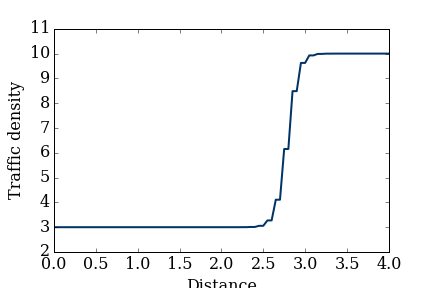
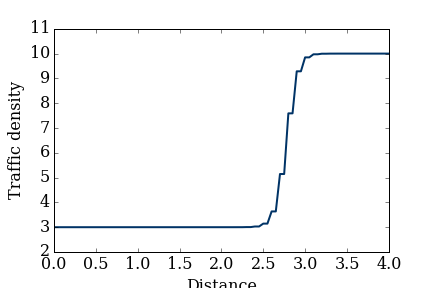
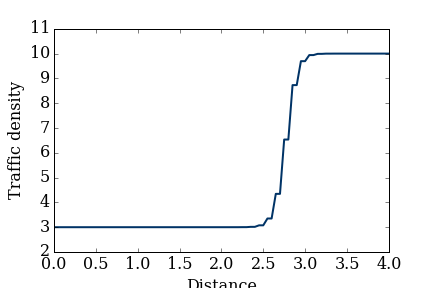
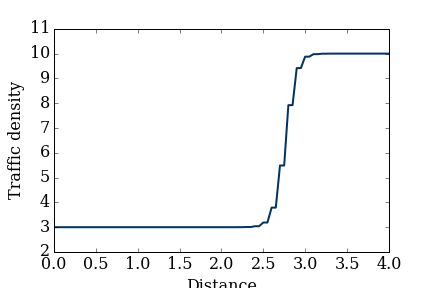
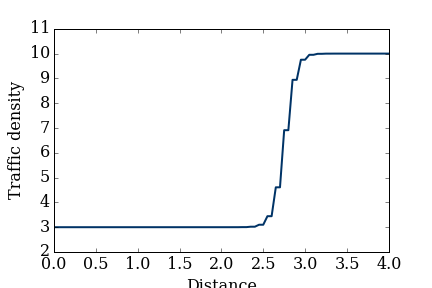

In [29]:
anim = animation.FuncAnimation(fig, animate, frames=rho_n, interval=50)
display_animation(anim, default_mode='once')

In [37]:
def Jacobian(u_max, rho_max, rho):
    return u_max*(1-2*rho/rho_max)

def laxw(rho,nt,dt,dx,rho_max,u_max):
    
    rho_n = numpy.zeros((nt,len(rho)))
    rho_n[:,:] = rho.copy()
    
    for t in range(1,nt):
        F = computeF(u_max, rho_max, rho)
        J = Jacobian(u_max, rho_max, rho)
        
        rho_n[t,1:-1] = rho[1:-1] - dt/(2*dx)*(F[2:]-F[:-2]) \
                           + dt**2/(4*dx**2) * ( (J[2:]+J[1:-1])*(F[2:]-F[1:-1]) \
                           - (J[1:-1]+J[:-2])*(F[1:-1]-F[:-2]) )
            
        rho_n[t,0] = rho[0]
        rho_n[t,-1] = rho[-1]
        rho = rho_n[t].copy()
        
    return rho_n

In [38]:
rho = rho_red_light(nx,rho_max,rho_in)
sigman = 1
dt = sigma*dx/u_max
rho_n = laxw(rho,nt,dt,dx,rho_max,u_max)


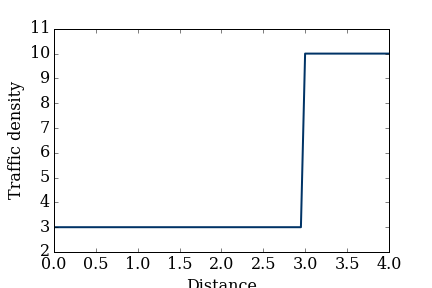
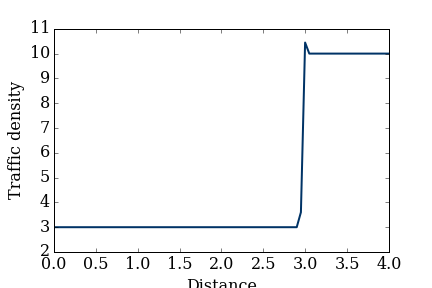
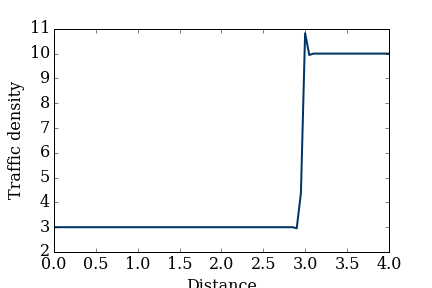
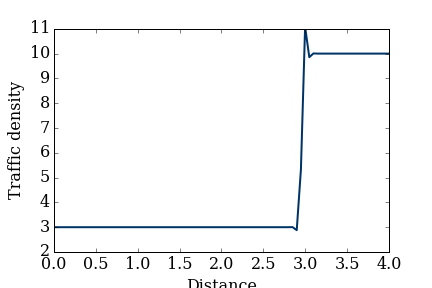
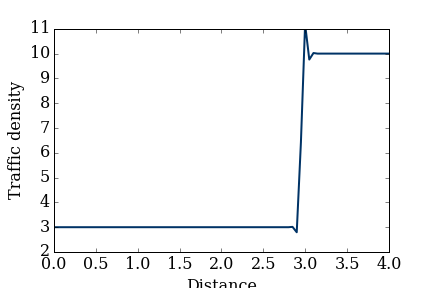
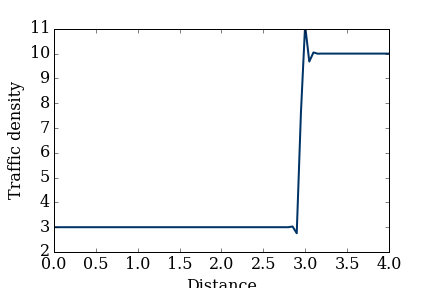
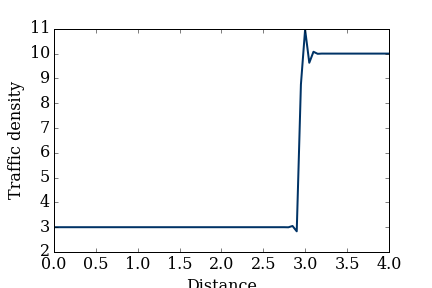
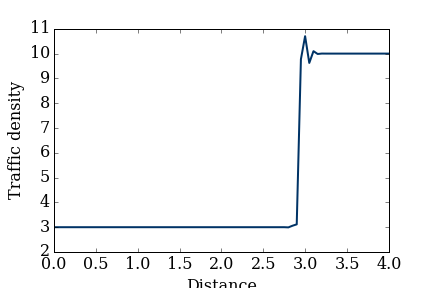
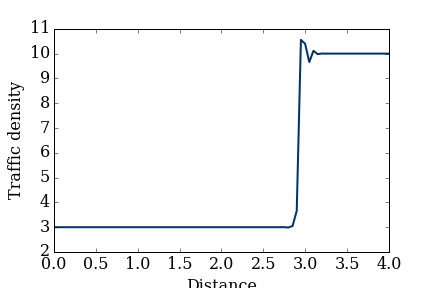
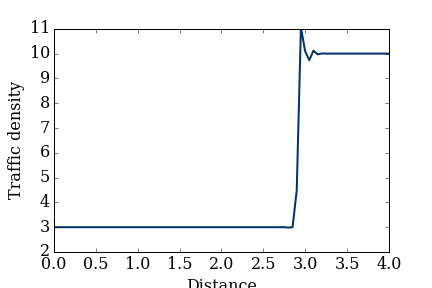
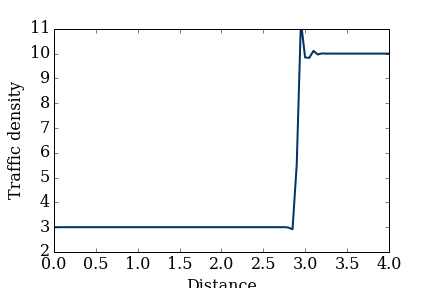
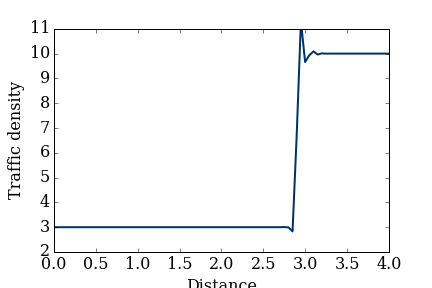
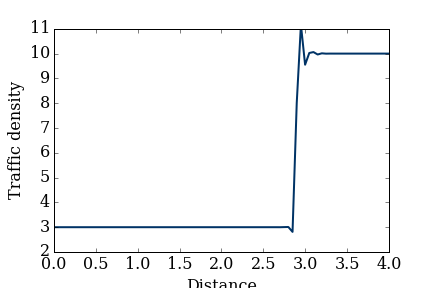
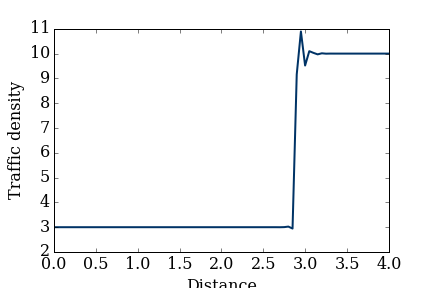
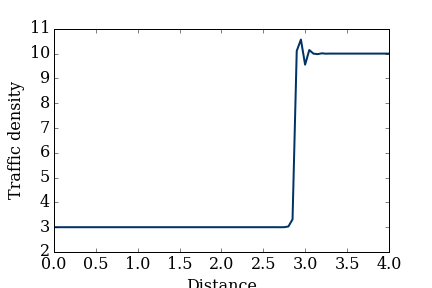
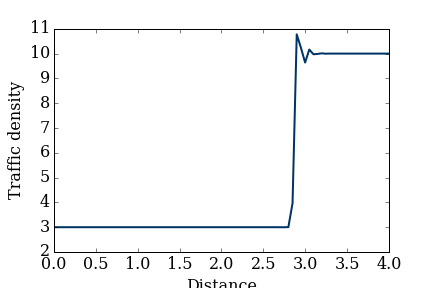
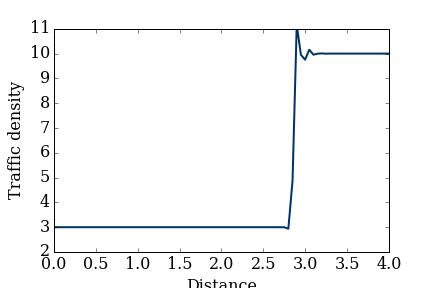
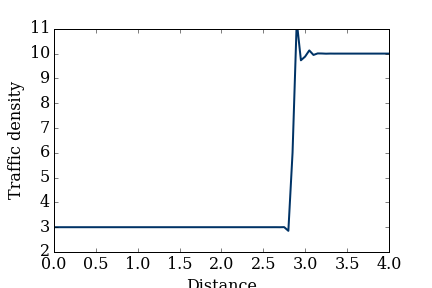
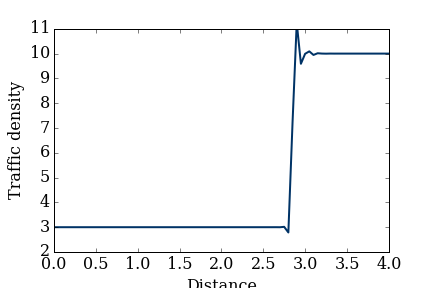
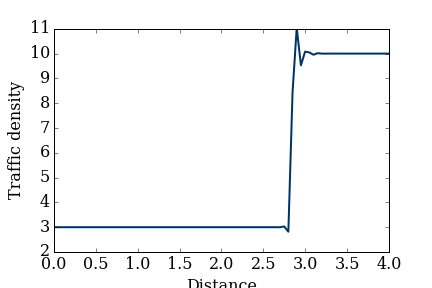
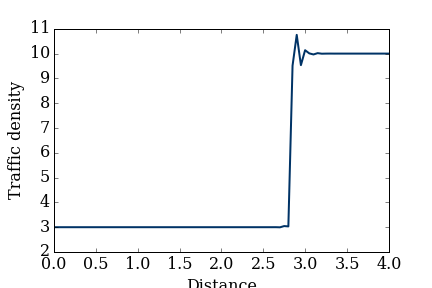
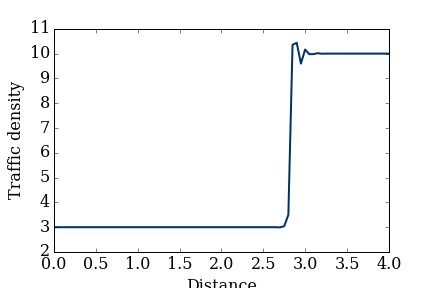
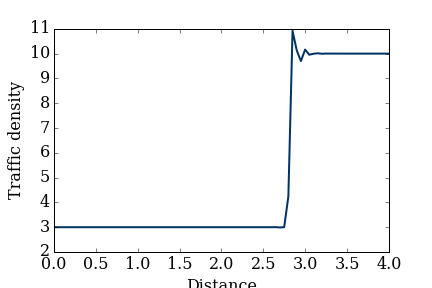
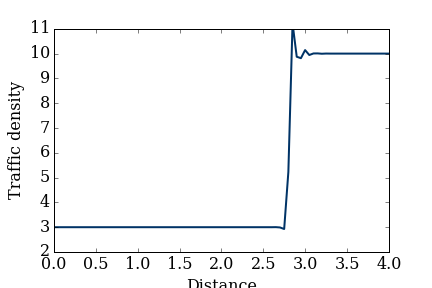
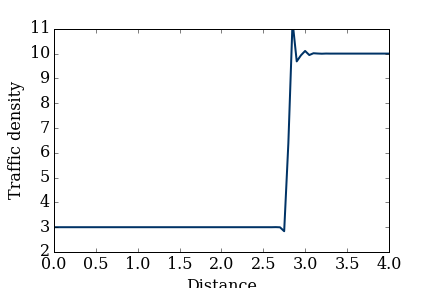
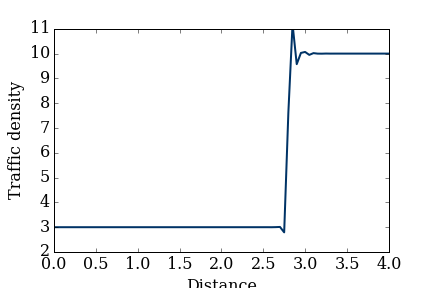
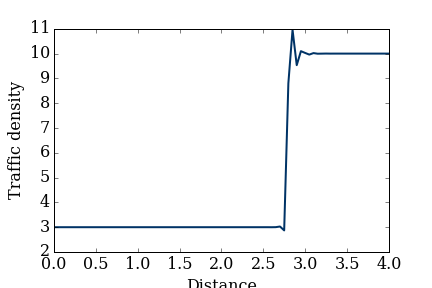
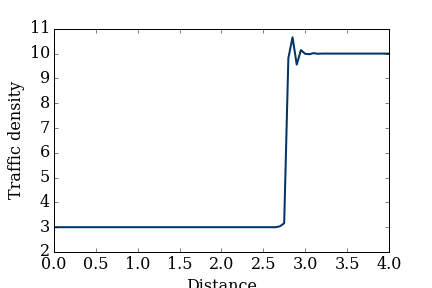
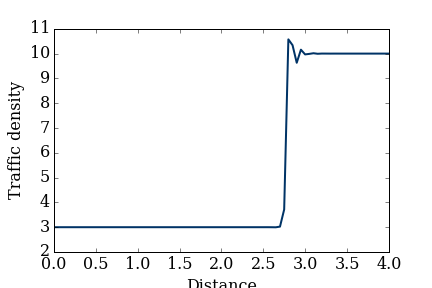
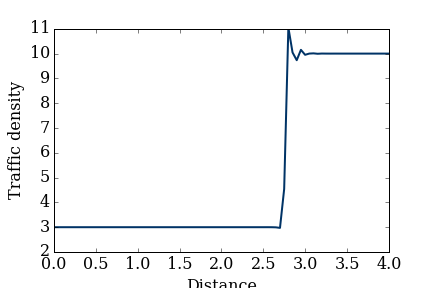

In [39]:
fig = pyplot.figure();
ax = pyplot.axes(xlim=(0,4),ylim=(2,11.),xlabel=('Distance'),ylabel=('Traffic density'));
line, = ax.plot([],[],color='#003366', lw=2);

anim = animation.FuncAnimation(fig, animate, frames=rho_n, interval=50)
display_animation(anim, default_mode='once')


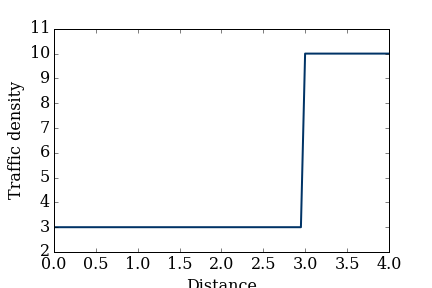
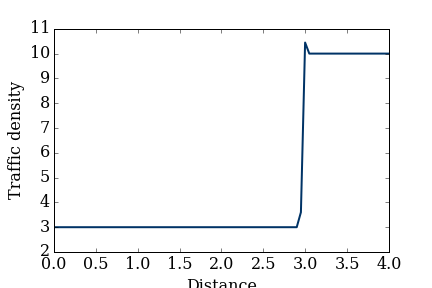
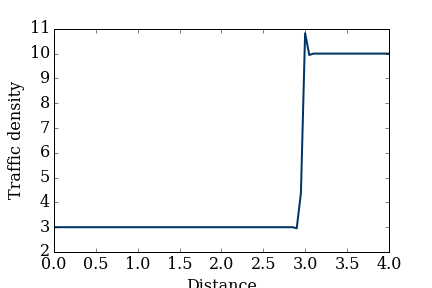
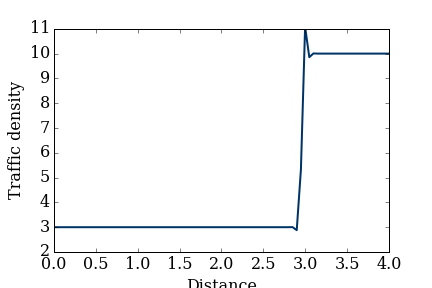
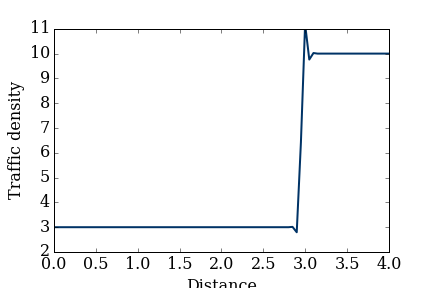
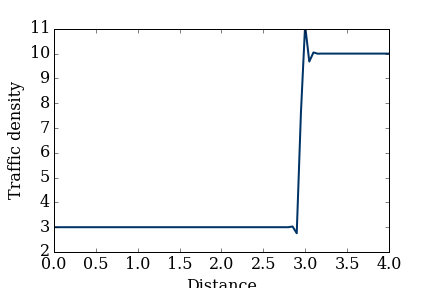
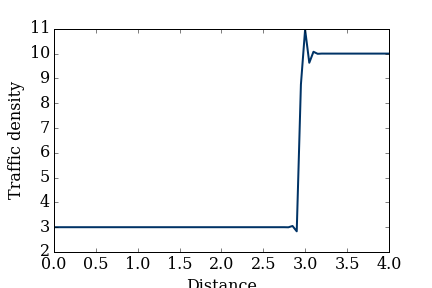
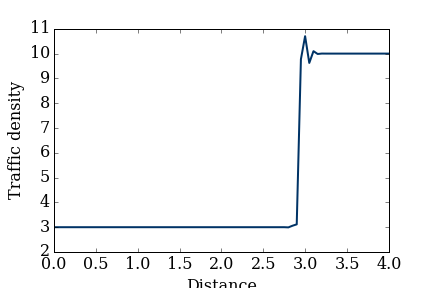
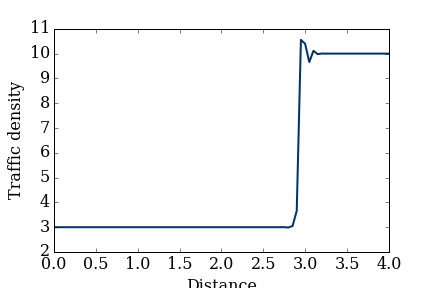
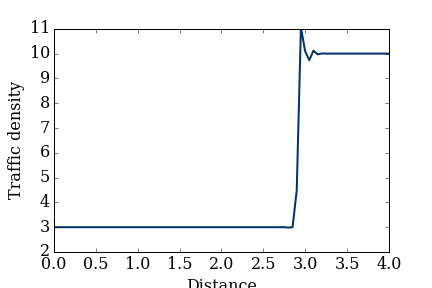
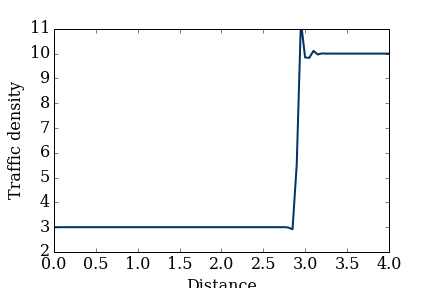
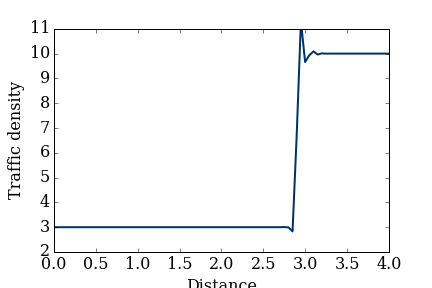
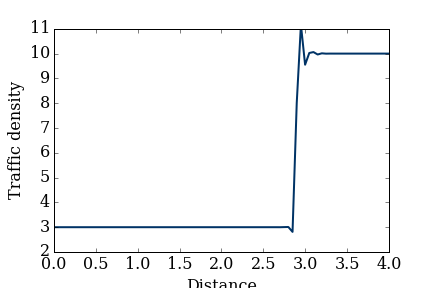
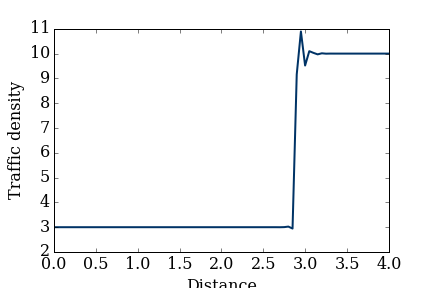
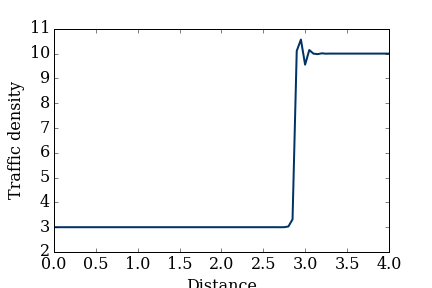
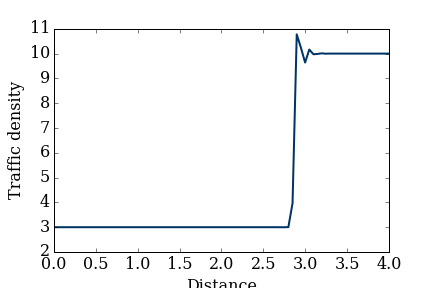
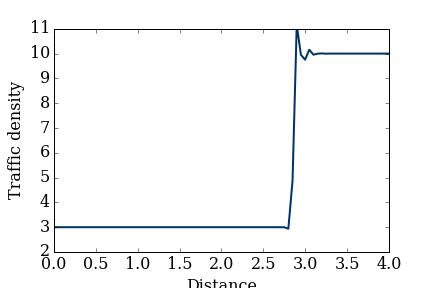
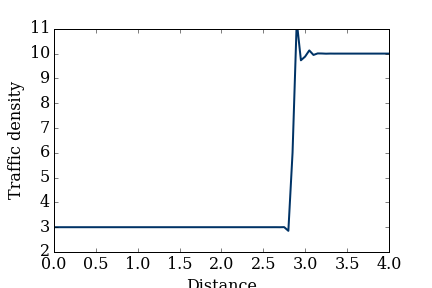
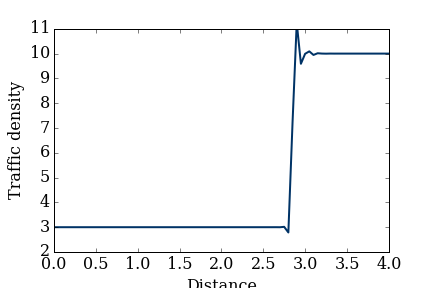
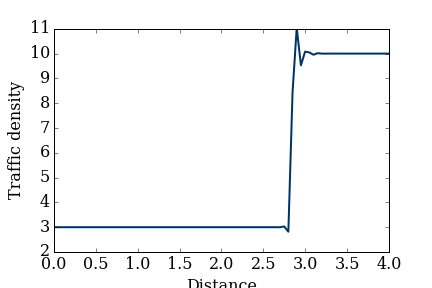
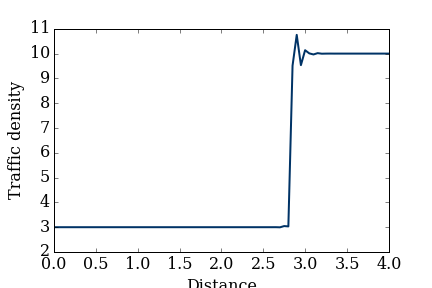
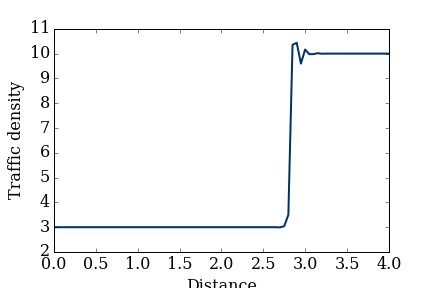
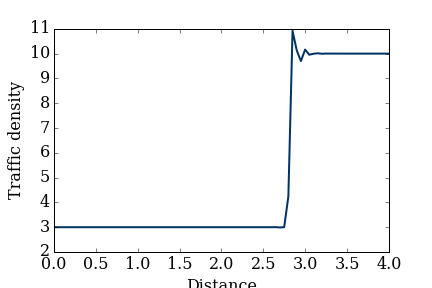
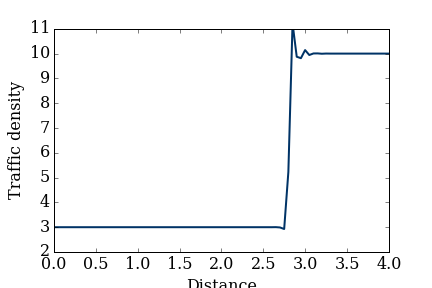
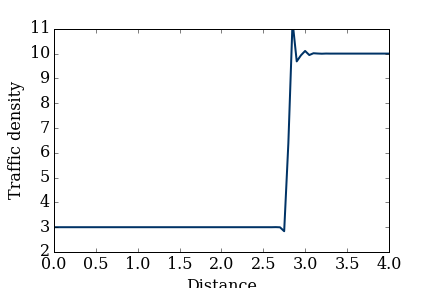
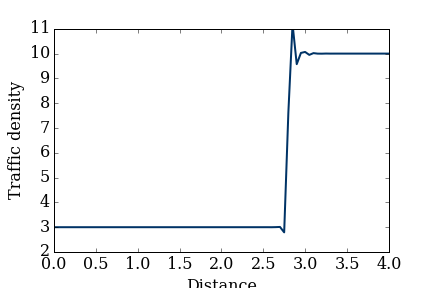
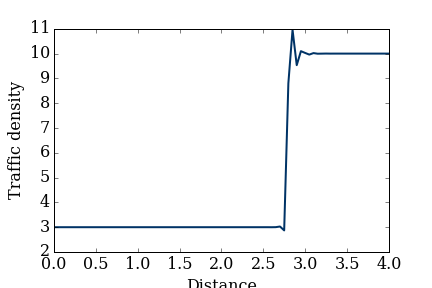
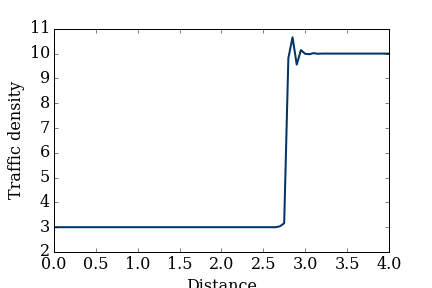
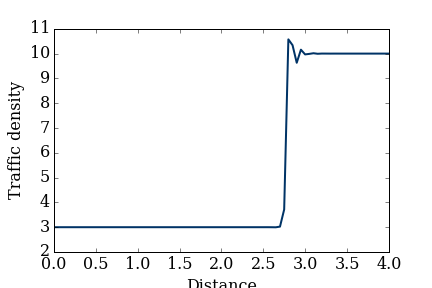
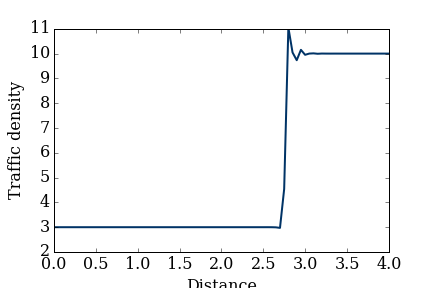

In [40]:
rho = rho_red_light(nx, rho_max, rho_in) 
sigma = 0.5
dt = sigma*dx/u_max
rho_n = laxw(rho, nt, dt, dx, rho_max, u_max)

fig = pyplot.figure();
ax = pyplot.axes(xlim=(0,4),ylim=(2,11),xlabel=('Distance'),ylabel=('Traffic density'));
line, = ax.plot([],[],color='#003366', lw=2);

anim = animation.FuncAnimation(fig, animate, frames=rho_n, interval=50)
display_animation(anim, default_mode='once')

In [41]:
def mac(rho,nt,dt,dx,u_max,rho_max):
    
    rho_n = numpy.zeros((nt,len(rho)))
    rho_star = numpy.empty_like(rho)
    rho_n[:,:] = rho.copy()
    rho_star = rho.copy()
    
    for t in range(1,nt):
        F = computeF(u_max, rho_max, rho)
        rho_star[:-1] = rho[:-1] - dt/dx * (F[1:] - F[:-1])
        Fstar = computeF(u_max, rho_max, rho_star)
        rho_n[t,1:] = .5*  (rho[1:] +rho_star[1:] - dt/dx * (Fstar[1:]- Fstar[:-1]))
        rho = rho_n[t].copy()
    
    return rho_n


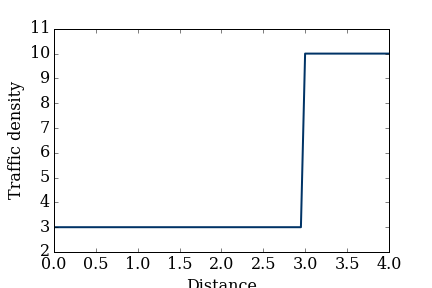
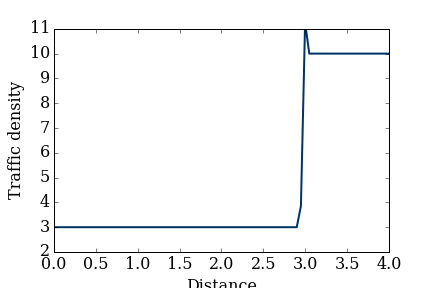
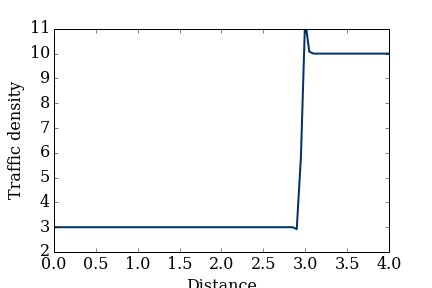
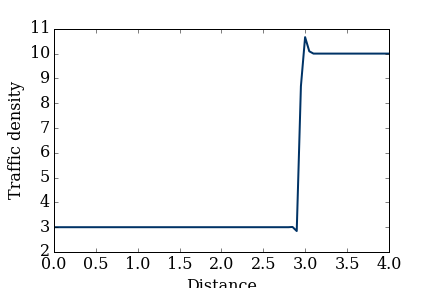
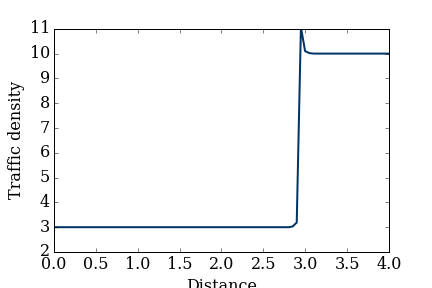
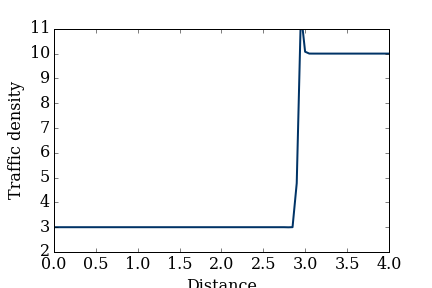
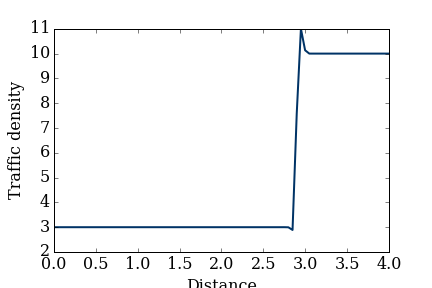
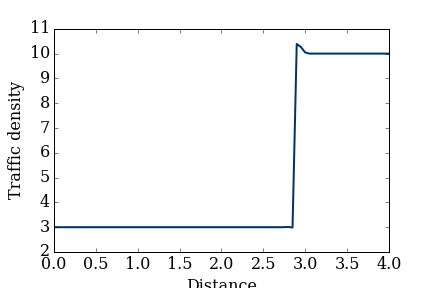
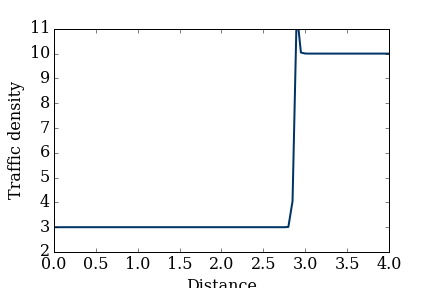
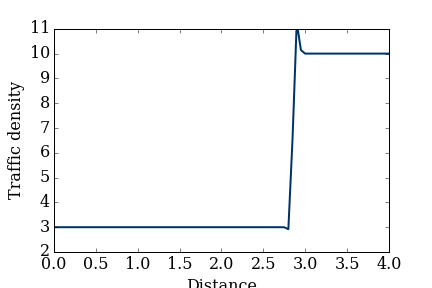
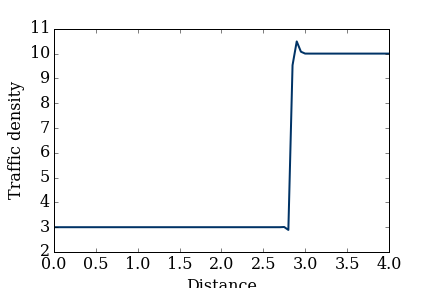
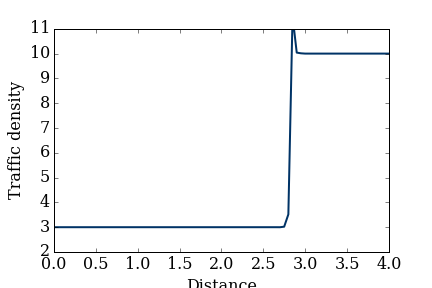
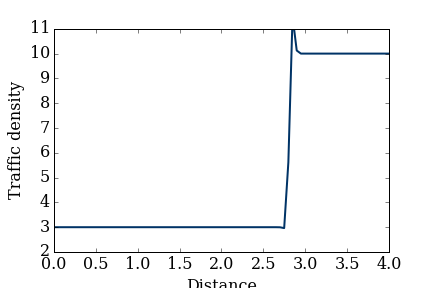
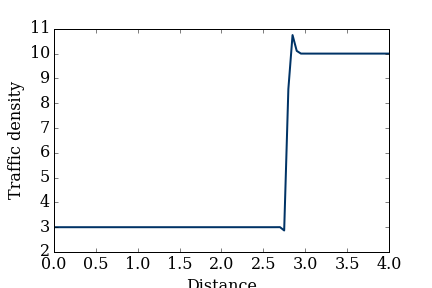
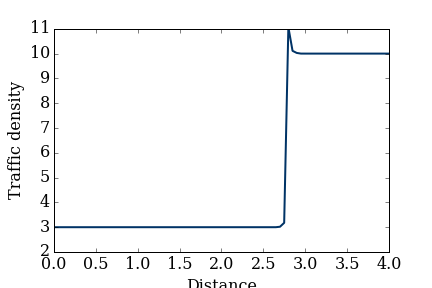
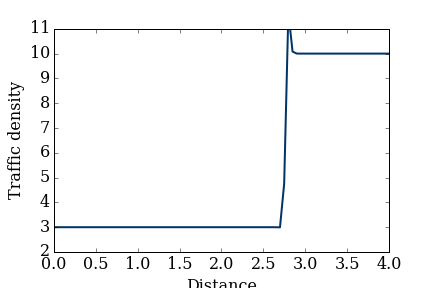
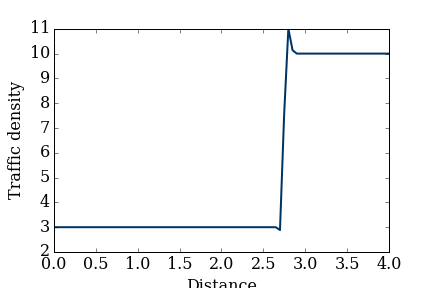
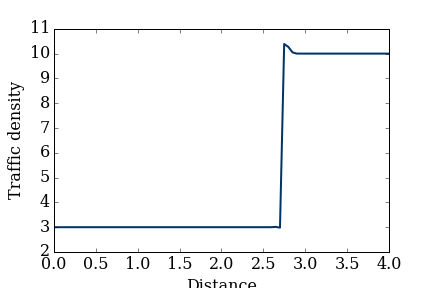
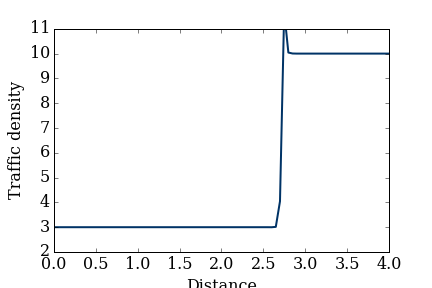
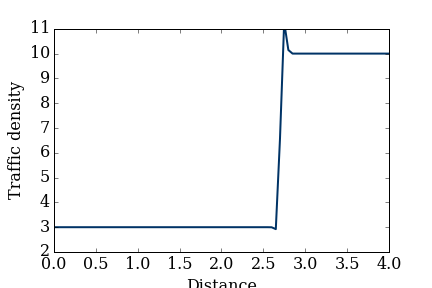
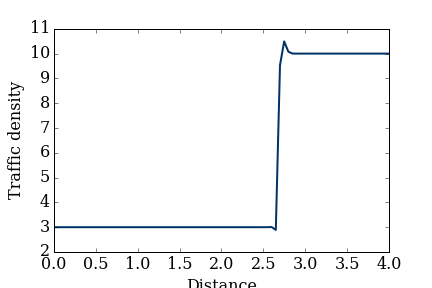
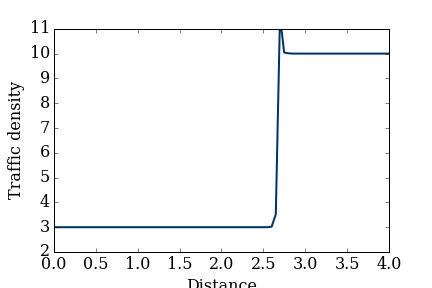
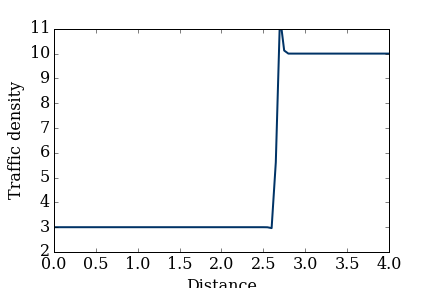
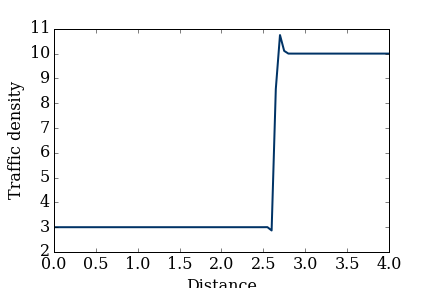
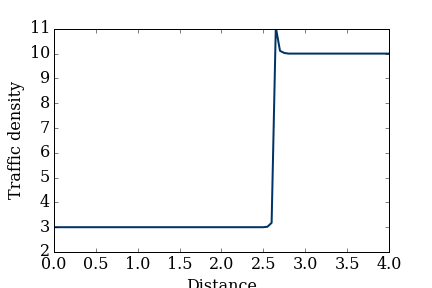
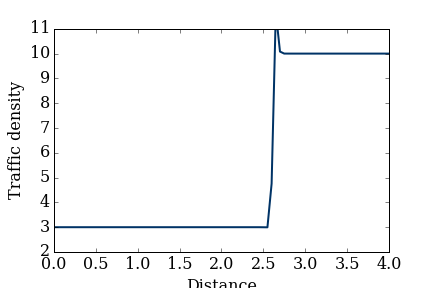
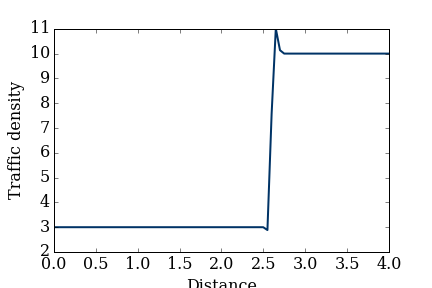
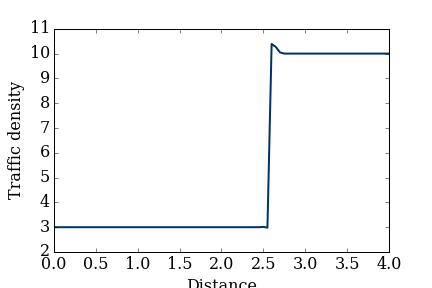
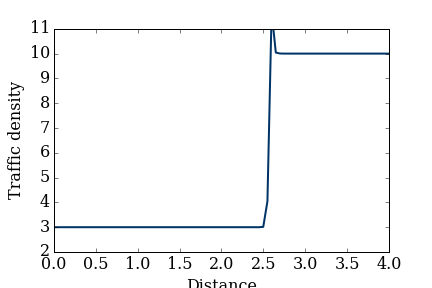
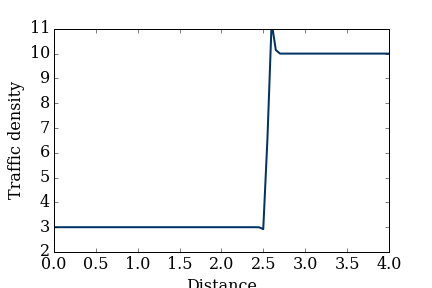

In [42]:
rho = rho_red_light(nx, rho_max, rho_in)
sigma = 1.0
dt = sigma*dx/u_max

rho_n = mac(rho,nt,dt,dx,u_max,rho_max)

fig = pyplot.figure();
ax = pyplot.axes(xlim=(0,4),ylim=(2,11),xlabel=('Distance'),ylabel=('Traffic density'));
line, = ax.plot([],[],color='#003366', lw=2);

anim = animation.FuncAnimation(fig, animate, frames=rho_n, interval=50)
display_animation(anim, default_mode='once')


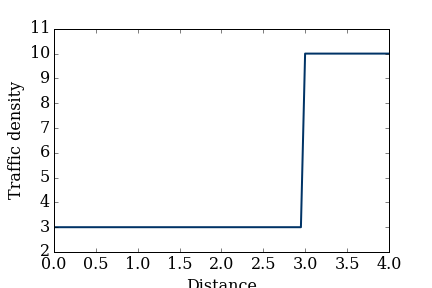
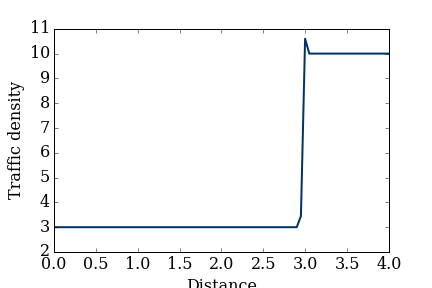
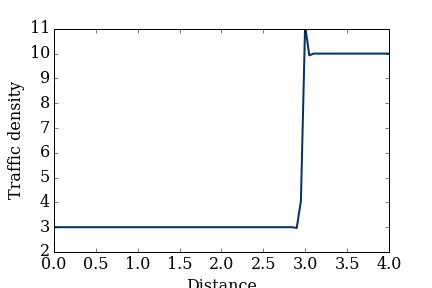
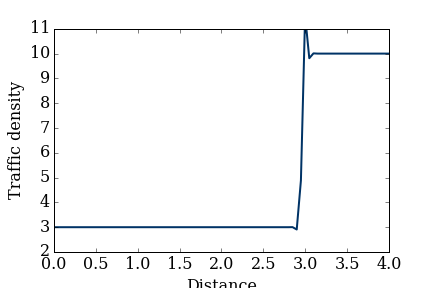
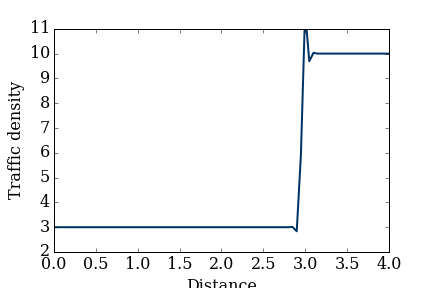
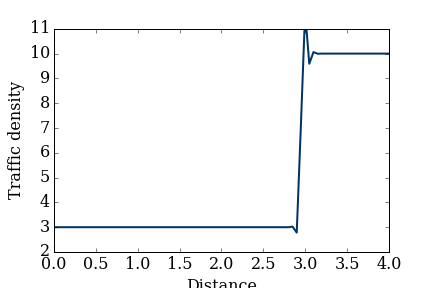
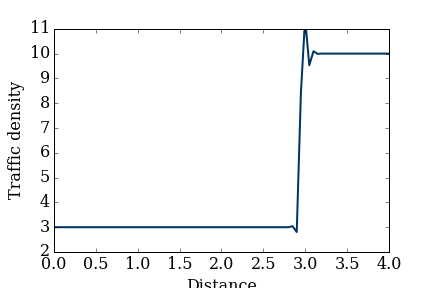
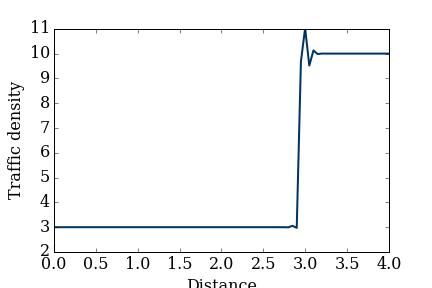
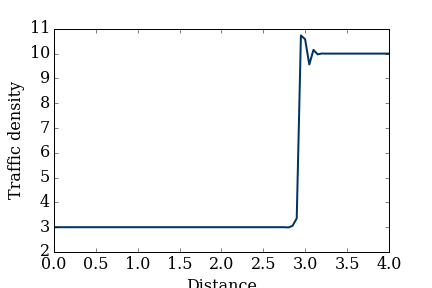
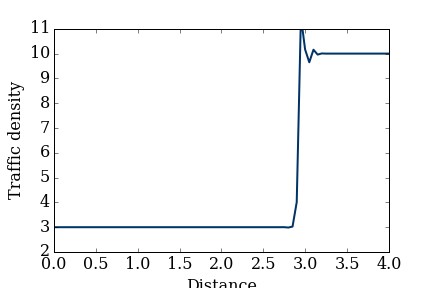
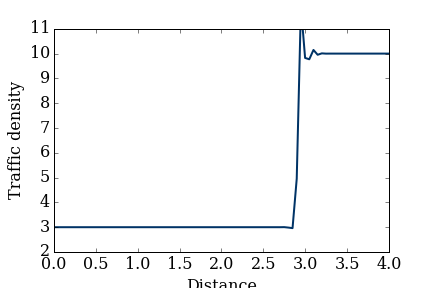
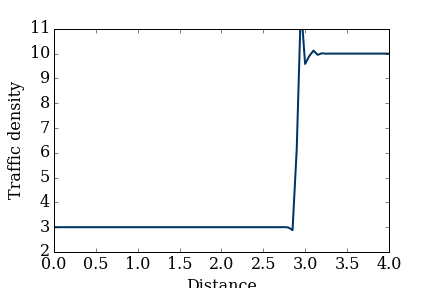
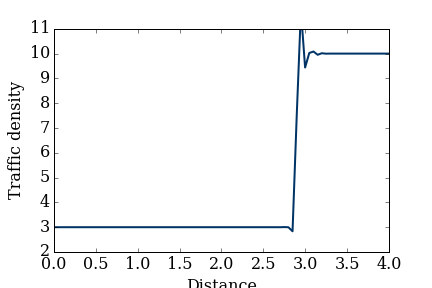
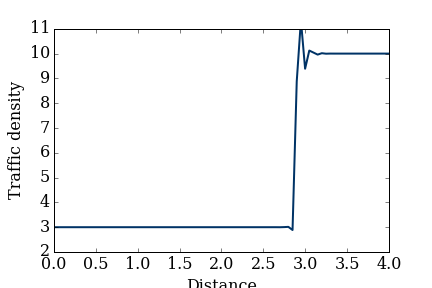
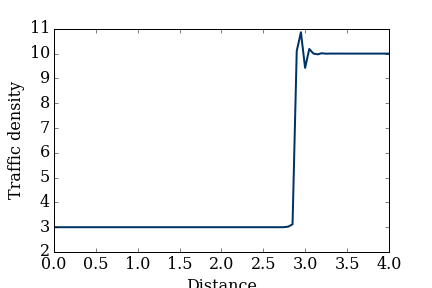
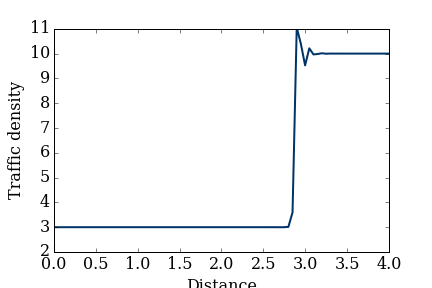
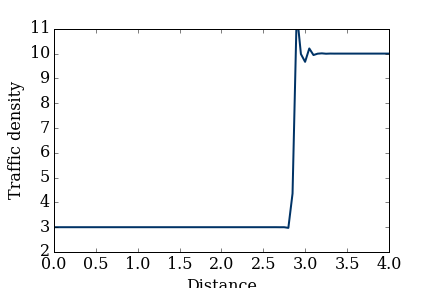
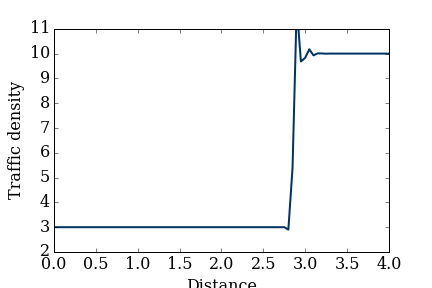
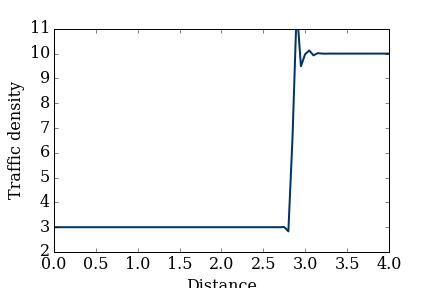
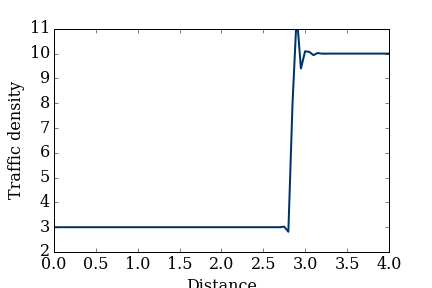
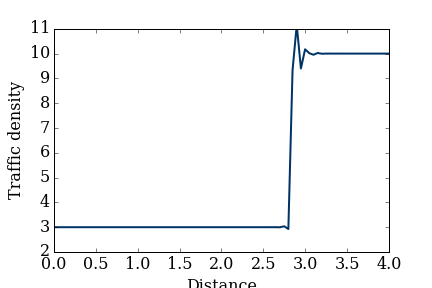
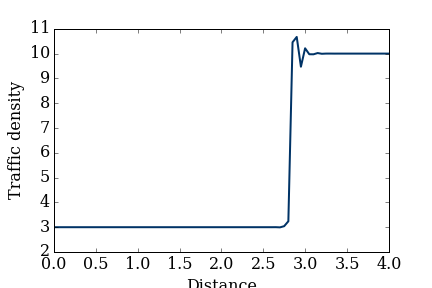
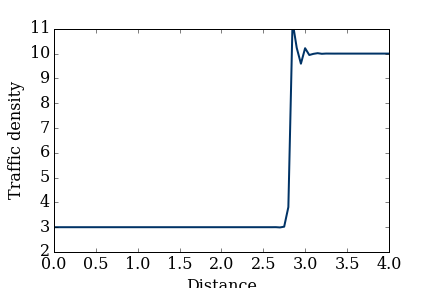
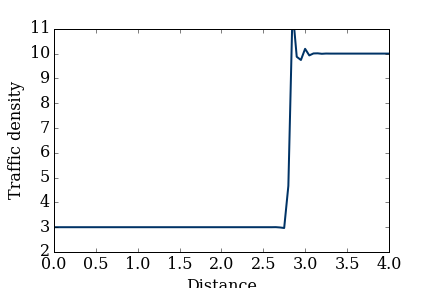
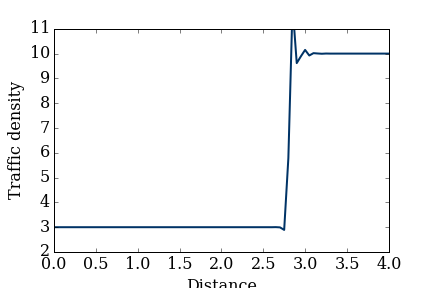
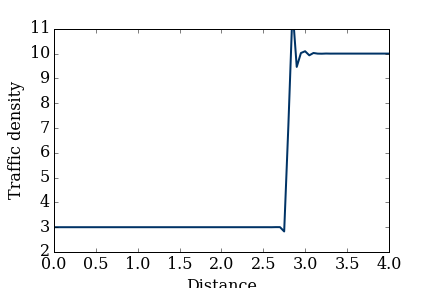
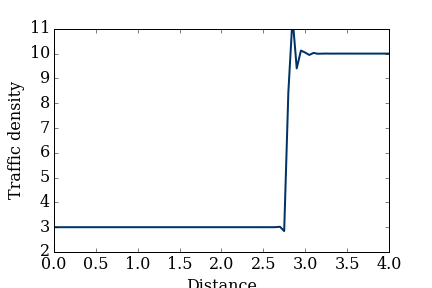
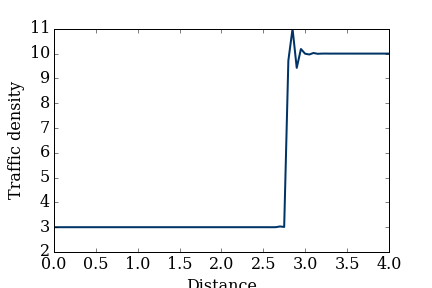
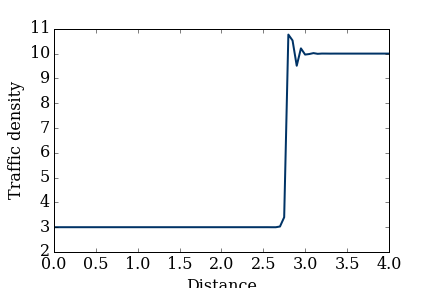
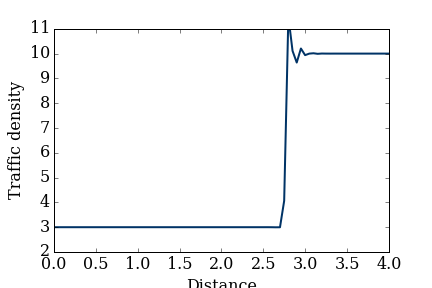

In [43]:
rho = rho_red_light(nx, rho_max, rho_in)
sigma = 0.5
dt = sigma*dx/u_max

rho_n = mac(rho,nt,dt,dx,u_max,rho_max)

fig = pyplot.figure();
ax = pyplot.axes(xlim=(0,4),ylim=(2,11),xlabel=('Distance'),ylabel=('Traffic density'));
line, = ax.plot([],[],color='#003366', lw=2);

anim = animation.FuncAnimation(fig, animate, frames=rho_n, interval=50)
display_animation(anim, default_mode='once')